<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/AAI/TP/AAI_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

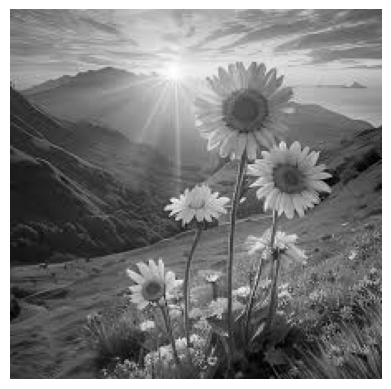

In [ ]:
original_image = cv2.imread("/pic2.jpeg")
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
# Display the grayscale image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def wrappingImage(img, kernelSize : int):
    ### width of the mask
    w = kernelSize // 2

    # Fetch First Rows of for wrapping
    fetchFirstRows = img[0 : w , :]
    fetchLastRows = img[-w : , : ]

    imgWrapped = img.copy()
    imgWrapped = np.insert(imgWrapped, 0, fetchLastRows, axis=0)
    imgWrapped = np.append(imgWrapped, fetchFirstRows, axis = 0)

    ### Fetch First and Last Colsfro wrapping
    fetchFirstCols = imgWrapped[:, 0 : w]
    fetchLastCols = imgWrapped[:, -w : ]
    imgWrapped = np.concatenate([fetchLastCols,imgWrapped], axis=1)
    imgWrapped = np.append(imgWrapped, fetchFirstCols, axis = 1)

    return imgWrapped

def meanFilter(originalImg, wrappedImage, kernelSize: int):
    filteredImage = np.zeros(originalImg.shape, dtype=np.int32)

    image_h, image_w = originalImg.shape[0], originalImg.shape[1]

    w = kernelSize // 2

    for i in range(w, image_h - w):
        for j in range(w, image_w - w):
            total = 0

            for m in range(kernelSize):
                for n in range(kernelSize):
                    total += wrappedImage[i - w + m][j - w + n]

            # Compute the mean value and assign it to the output image
            filteredImage[i, j] = total // (kernelSize * kernelSize)  # Integer division

    return filteredImage

wrappedImg = wrappingImage(img, 3)
## mean filter image
meanFilteredImg = meanFilter(img, wrappedImg, 3)




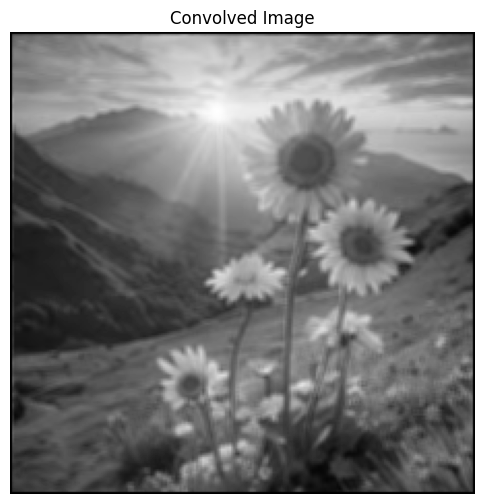

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(meanFilteredImg, cmap='gray')
plt.title('Filtered Image using mean filter')
plt.title('Convolved Image')
plt.axis('off')
plt.show()

In [ ]:

def convolve2d(image, kernel):
    image_height, image_width = image.shape
    k_height, k_width = kernel.shape  # Corrected typo here

    # Add padding to the image
    padded_image = np.pad(image, ((k_height//2, k_height//2), (k_width//2, k_width//2)), mode='constant', constant_values=0)

    # Initialize output image with zeros (same size as input)
    #output = np.zeros((image_height, image_width))
    output = output = np.zeros_like(image)
    # Perform convolution
    for y in range(image_height):
        for x in range(image_width):
            # Extract the region of interest from the padded image
            region = padded_image[y:y+k_height, x:x+k_width]

            # Apply the kernel on the region (element-wise multiplication and sum)
            output[y, x] = np.sum(region * kernel)

    return output




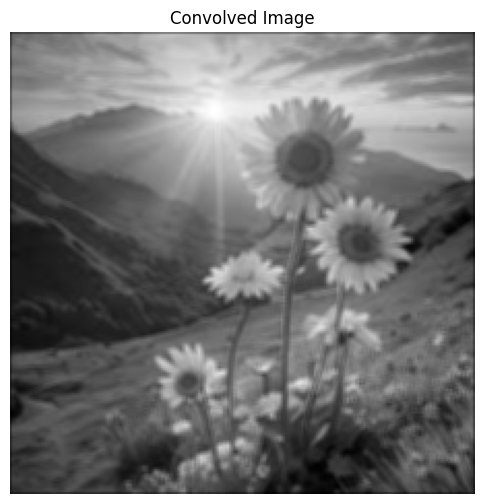

In [ ]:
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])


convolved_image = convolve2d(img, kernel)

plt.figure(figsize=(6,6))
plt.imshow(convolved_image, cmap='gray')
plt.title('Filtered Image using Convolution')
plt.title('Convolved Image')
plt.axis('off')
plt.show()


(-0.5, 224.5, 223.5, -0.5)

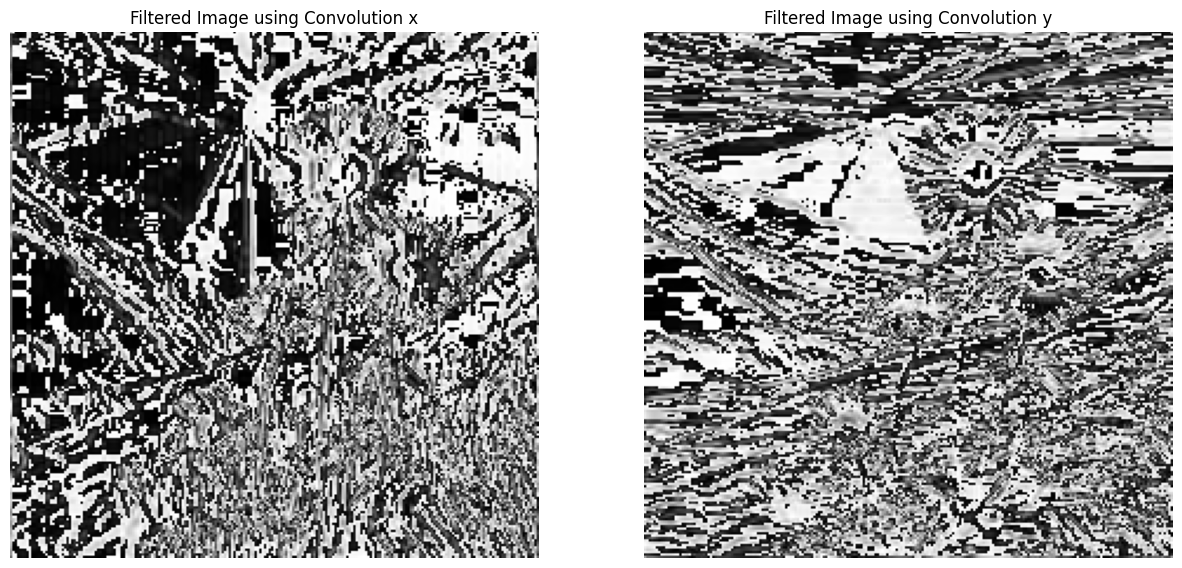

In [ ]:
# Prewitt X and Y kernels
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply Prewitt filters

prewitt_x_image = convolve2d(img, prewitt_x)
prewitt_y_image = convolve2d(img, prewitt_y)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(prewitt_x_image, cmap='gray')
plt.title('Filtered Image using Convolution x')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prewitt_y_image, cmap='gray')
plt.title('Filtered Image using Convolution y')
plt.axis('off')


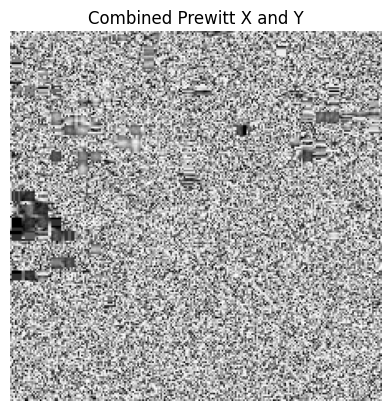

In [ ]:
combined_image = np.sqrt(prewitt_x_image**2 + prewitt_y_image**2)
plt.imshow(combined_image, cmap='gray')
plt.title('Combined Prewitt X and Y')
plt.axis('off')
plt.show()

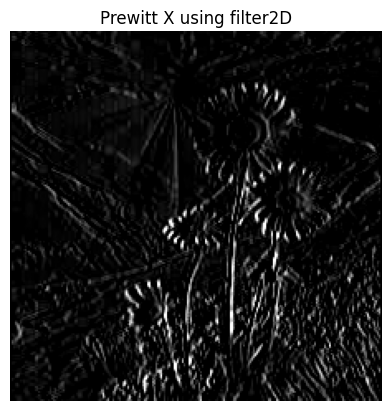

In [ ]:
# Using OpenCV filter2D for comparison
filtered_with_filter2D = cv2.filter2D(img, -1, prewitt_x)

#plt.subplot(1, 2, 1)
plt.imshow(filtered_with_filter2D, cmap='gray')
plt.title('Prewitt X using filter2D')
plt.axis('off')
'''
plt.subplot(1,2,2)
plt.imshow(combined_image, cmap='gray')
plt.title('Combined Prewitt X and Y')
plt.axis('off')
'''
plt.show()
